## **EXPLORATORY DATA ANALYSIS**

#### **1. Import Libraries and Load Data**

In [1]:
#import ncessary libaries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")

print("libaries have been imported sucesssfully")

libaries have been imported sucesssfully


In [2]:
# load cleaned data
df = pd.read_csv("Easy_Vias_clean_data.csv")
df.head(5)

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


----------------------------------------------------------------
 ### **1.Premliminary Data Analysis **
 ---------------------------------------------------------------

In [ ]:
# get the descriptive analysis of the numerical columns
def pda_num_col(df):
    """ Descriptive analysis for numerical column"""
    """
    Parameter: Dataframe
    Return: Descriptive Analysis Table
    """
    num_col = df.select_dtypes(include=["float64","int64"]).columns
    return df[num_col].describe()

In [9]:
pda_num_col(df)

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


In [ ]:
# Let's check the count of each unique category in each of the categorical variables
def count_categorical_values(df):
    """ Counts unique category in each of the categorical columns in the dataframe"""
    """
    Parameter: Dataframe
    Return: Value counts Table
    """

    cat_col = list(df.select_dtypes("object").columns)
    for col in cat_col:
        cat_count = df[col].value_counts()
        print(cat_count)
        print("-" * 50)

In [12]:
count_categorical_values(df)

continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64
--------------------------------------------------
education_of_employee
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: count, dtype: int64
--------------------------------------------------
has_job_experience
Y    14802
N    10678
Name: count, dtype: int64
--------------------------------------------------
requires_job_training
N    22525
Y     2955
Name: count, dtype: int64
--------------------------------------------------
region_of_employment
Northeast    7195
South        7017
West         6586
Midwest      4307
Island        375
Name: count, dtype: int64
--------------------------------------------------
unit_of_wage
Year     22962
Hour      2157
Week       272
Month       89
Name: count, dtype: int64
--------------------------------------------------
full_time_posit

----------------------------------------------------------------
 ### **2. Univariate analysis**
 ---------------------------------------------------------------

In [ ]:
def numeric_analysis(data, feature):
    """
    Performs univariate EDA on a single numerical column.
    Displays summary statistics, skewness, kurtosis, histogram, KDE, and boxplot.
    data: dataframe
    feature: dataframe column
    """
    # prints the name, skewness and kurtosis of the columns
    print(f"Feature: {feature}")
    print("="*40)
    print(f"Skewness: {data[feature].skew():.3f}")
    print(f"Kurtosis: {data[feature].kurt():.3f}")

    # set figure size of the visuals
    plt.figure(figsize=(12,4))

    # Histogram + KDE
    plt.subplot(1,2,1)
    sns.histplot(data[feature], kde=True, bins=30)
    plt.title(f'\n Distribution of {feature}', fontsize=13)
    plt.xlabel(feature)
    plt.ylabel('Frequency')

    # Boxplot
    plt.subplot(1,2,2)
    plt.subplot(1,2,2)
    sns.boxplot(x=data[feature], color='teal')
    plt.title(f'\n Boxplot of {feature}', fontsize=13)

    # show the feature
    plt.tight_layout()
    plt.show()


        # Optional note on transformation
    if abs(data[feature].skew()) > 1:
        print(f"\n {feature} is highly skewed. Consider log or Box-Cox transformation.")
    elif abs(data[feature].skew()) > 0.5:
        print(f"{feature} is moderately skewed.")
    else:
        print(f"{feature} is fairly symmetric.")


Feature: no_of_employees
Skewness: 12.265
Kurtosis: 206.335


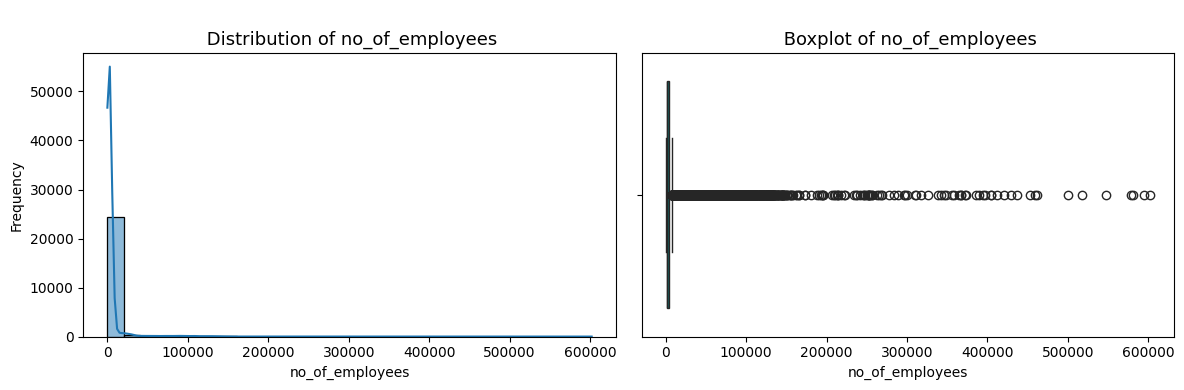


 no_of_employees is highly skewed. Consider log or Box-Cox transformation.
Feature: yr_of_estab
Skewness: -2.037
Kurtosis: 3.507


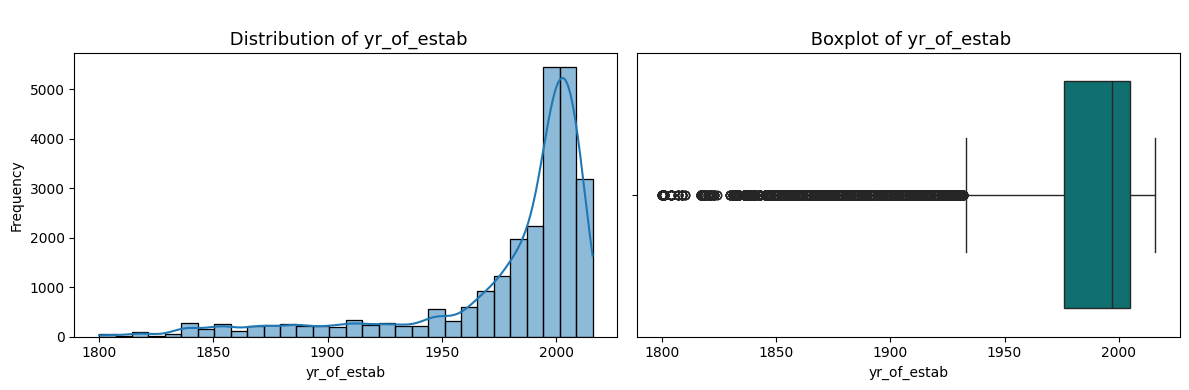


 yr_of_estab is highly skewed. Consider log or Box-Cox transformation.
Feature: prevailing_wage
Skewness: 0.756
Kurtosis: 0.824


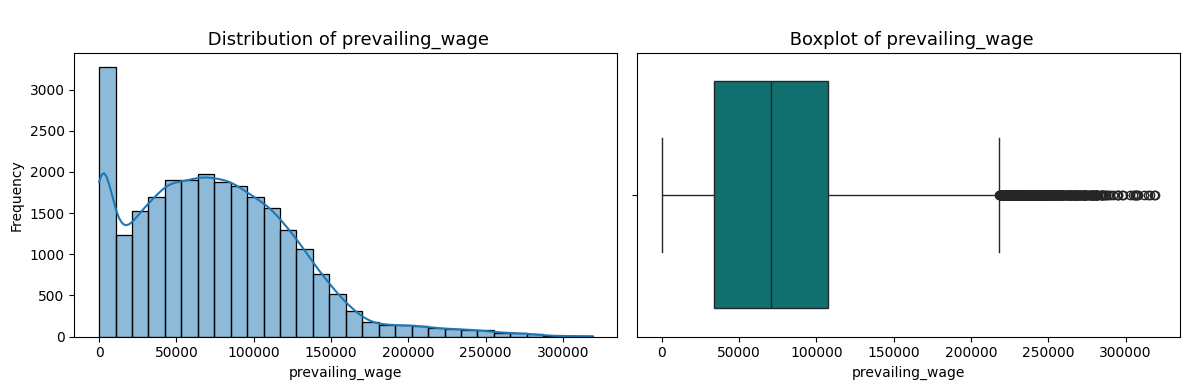

prevailing_wage is moderately skewed.


In [14]:
num_features = list(df.select_dtypes(include=["float64","int64"]).columns)
for col in num_features:
    numeric_analysis(df, col)


In [16]:
def univerate_cataegorical(data, feature):
      """
    Performs univariate EDA on a categorical or ordinal column.
    Displays frequency table, proportion, and a countplot.
        data: dataframe
    feature: dataframe column
    """
      
      print(f"Feature: {feature}")
      print("="*40)
      
          # Frequency + proportion
      freq = data[feature].value_counts()
      prop = data[feature].value_counts(normalize=True) * 100
      summary = pd.DataFrame({'Count': freq, 'Percentage': prop.round(2)})
      print(summary)
      print()

      # Visualization
      plt.figure(figsize=(8,5))
      ax = sns.countplot(x=feature, data=df, palette='Set2', order=freq.index,color='teal')
      plt.title(f'Distribution of {feature}', fontsize=13)
      plt.xlabel(feature)
      plt.ylabel('Count')

      # Annotate each bar with percentage
      total = len(df[feature])
      for p in ax.patches:
          height = p.get_height()
          ax.text(p.get_x() + p.get_width()/2, height + 1,
                  f'{(height/total)*100:.1f}%', ha='center')

      plt.tight_layout()
      plt.show()


      


Feature: continent
               Count  Percentage
continent                       
Asia           16861       66.17
Europe          3732       14.65
North America   3292       12.92
South America    852        3.34
Africa           551        2.16
Oceania          192        0.75



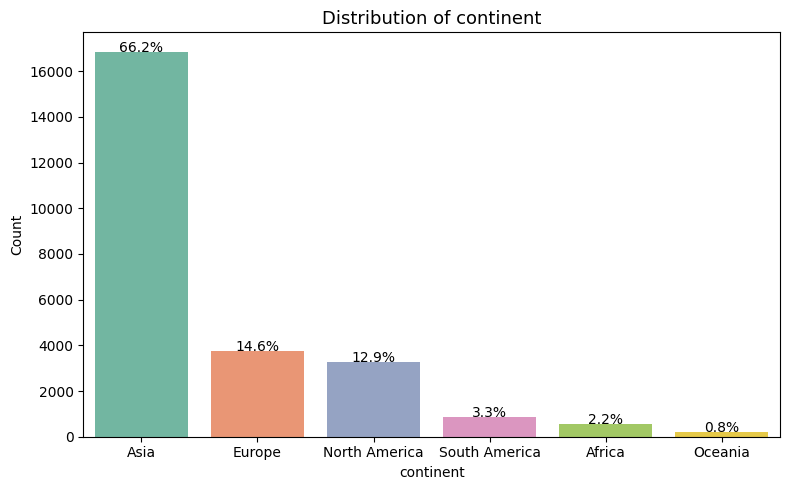

Feature: education_of_employee
                       Count  Percentage
education_of_employee                   
Bachelor's             10234       40.16
Master's                9634       37.81
High School             3420       13.42
Doctorate               2192        8.60



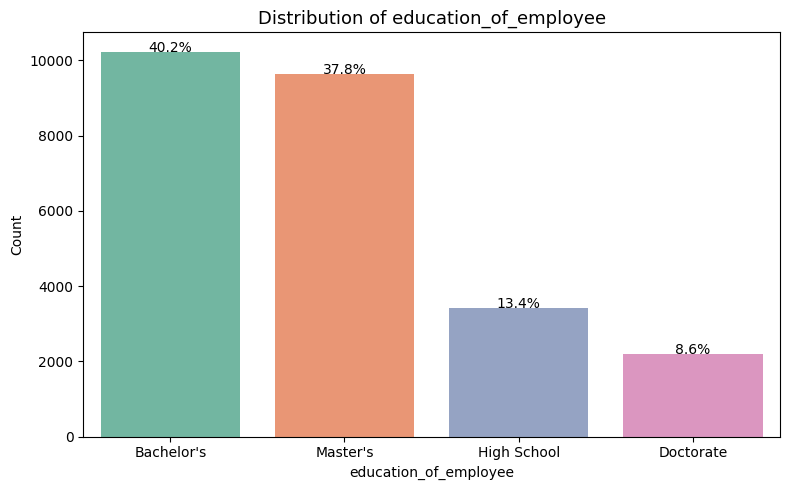

Feature: has_job_experience
                    Count  Percentage
has_job_experience                   
Y                   14802       58.09
N                   10678       41.91



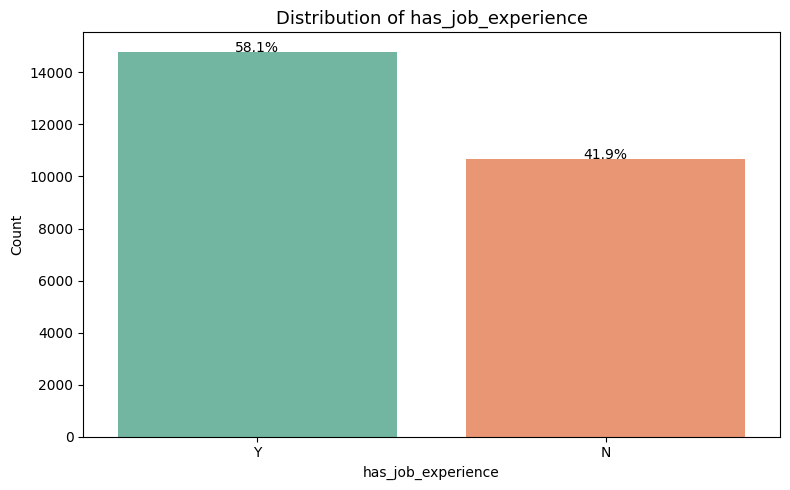

Feature: requires_job_training
                       Count  Percentage
requires_job_training                   
N                      22525        88.4
Y                       2955        11.6



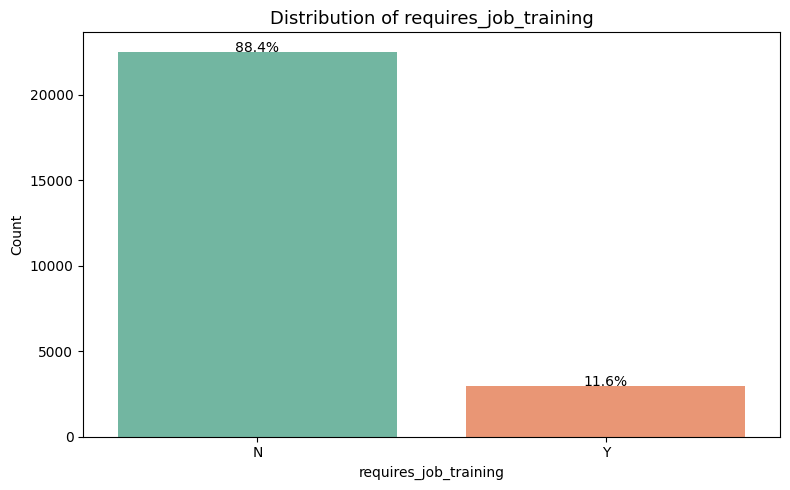

Feature: region_of_employment
                      Count  Percentage
region_of_employment                   
Northeast              7195       28.24
South                  7017       27.54
West                   6586       25.85
Midwest                4307       16.90
Island                  375        1.47



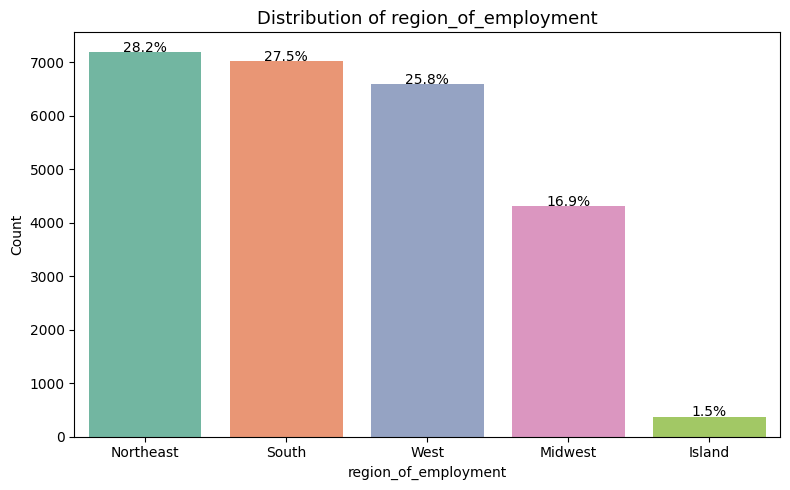

Feature: unit_of_wage
              Count  Percentage
unit_of_wage                   
Year          22962       90.12
Hour           2157        8.47
Week            272        1.07
Month            89        0.35



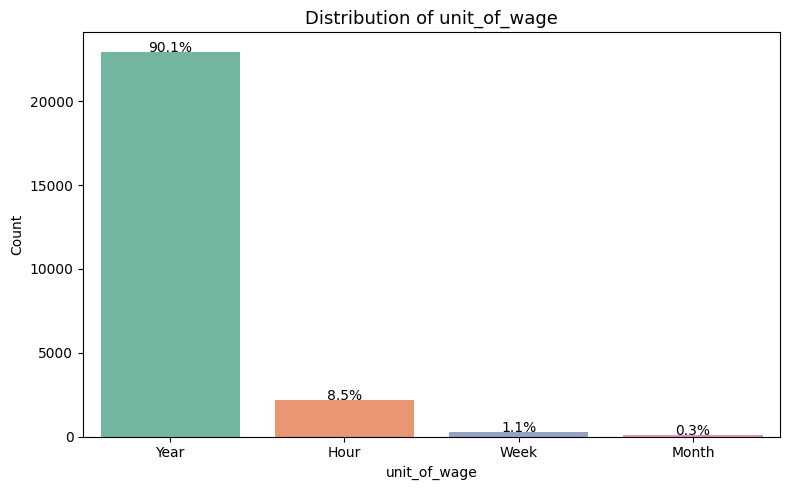

Feature: full_time_position
                    Count  Percentage
full_time_position                   
Y                   22773       89.38
N                    2707       10.62



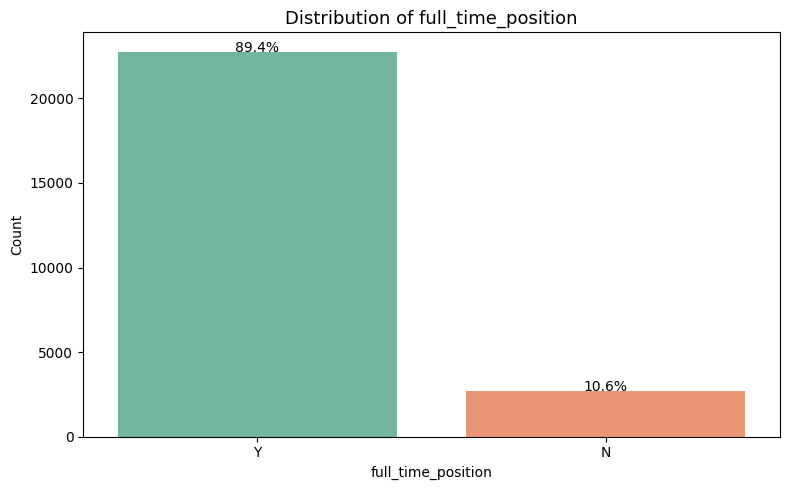

Feature: case_status
             Count  Percentage
case_status                   
Certified    17018       66.79
Denied        8462       33.21



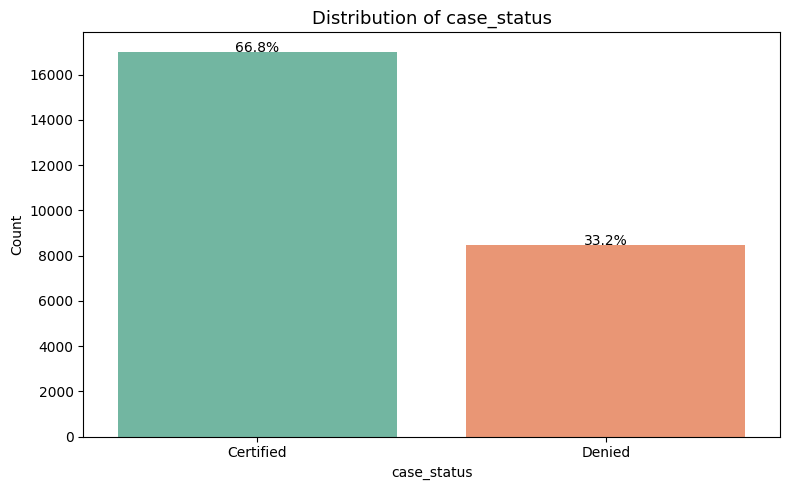

In [17]:
cat_features = list(df.select_dtypes("object").columns)
for col in cat_features :
    univerate_cataegorical(df, col)

## Insights from Histogram and Boxplot Visualizations:


1. No_of_Employees:**
- The distribution is strongly right skewed, the higher concentration of employees is slightly above 5000.
- **Outliers**: There are outliers on the higher end (above 7,000) which may significantly depend on the dataset context.
- **Action**: Consider using Log-Transformation
2. Year of Establishment

  * Distribution: The distribution is left-skewd, the higher concentration of establishment is below the 1940's

  * Outliers: The boxplot shows several outliers below the lower bond which could represent disparity in the year of establishment.

  ### Action:

You may consider applying a log transformation to make the distribution more symmetrical, which could improve model performance, especially for algorithms sensitive to skewness.
Evaluate if the outliers are valid or if they should be capped (using techniques like winsorization) or treated differently to reduce their impact on model training.

3. Prevailing wage
 * Prevailing wage is moderatley skewed, this could be has a result of the wages paid per year

 * Outliers: the boxplot shows several outliers above the upper bound which could show disparity in the wages paid.

  ### Action:

You may consider applying a log transformation to make the distribution more symmetrical, which could improve model performance, especially for algorithms sensitive to skewness.
Evaluate if the outliers are valid or if they should be capped (using techniques like winsorization) or treated differently to reduce their impact on model training.


 ### Observation from Categorical univaret analysis:

The target class is imblance of 66.79% to 33.21%. Consider SMOTE, class weighting, over sampling or under sampling to handle class imblance

----------------------------------------------------------------
 ### **3. Bivariate analysis**
 ---------------------------------------------------------------

In [18]:
def distribution_plot_with_target(data, predictor, target):
       """
    Visualizes the distribution and boxplots of a numerical predictor variable 
    with respect to a categorical target variable.

    This function generates a 2x2 grid of plots:
    1. Histogram + KDE for predictor values where target equals the first category.
    2. Histogram + KDE for predictor values where target equals the second category.
    3. Boxplot of predictor grouped by target.
    4. Boxplot of predictor grouped by target (without outliers).

    Parameters
    ----------
    data : pandas.DataFrame
        The dataset containing both predictor and target columns.
    predictor : str
        The name of the numerical variable whose distribution is to be visualized.
    target : str
        The name of the categorical target variable used for grouping.

    Returns
    -------
    None
        The function displays plots but does not return any value.
    """
        # Create a 2x2 grid of subplots with a total figure size of 12x10 inches
       fig, axs = plt.subplots(2, 2, figsize=(12, 10))
        # Get the unique categories or classes from the target column
       target_unique = data[target].unique()
       
        # --- Plot 1: Distribution (Histogram + KDE) for the first target category ---
       axs[0,0].set_title("Distribution of target for target=" + str(target_unique[0])) # Set title
       sns.histplot(
           data=data[data[target] == target_unique[0]],  # Filter data where target equals the first category
           x=predictor,    # Predictor variable on x-axis
           kde=True,       # Add Kernel Density Estimation curve
           ax=axs[0,0],    # Plot on the top-left subplot
           color="teal",   # Set histogram color
           stat="density", # Normalize histogram to show density

       )
       # --- Plot 2: Distribution (Histogram + KDE) for the second target category ---

       axs[0, 1].set_title("Distribution of target for target=" + str(target_unique[1]))   # Set title
       sns.histplot(
            data=data[data[target] == target_unique[1]],# Filter data where target equals the second category
            x=predictor,    # Predictor variable on x-axis
            kde=True,       # Add Kernel Density Estimation curve
            ax=axs[0, 1],   # Plot on the top-left subplot
            color="orange", # Set histogram color
            stat="density", # Normalize histogram to show density
        )
       
       # --- Plot 3: Boxplot of predictor vs. target ---
       axs[1, 0].set_title("Boxplot w.r.t target")    # Set title
       sns.boxplot(
              data=data,     # Use full dataset
              x=target,      # Categorical target on x-axis
              y=predictor,   # Numerical predictor on y-axis
              ax=axs[1, 0],  # Plot on bottom-left subplot
              palette="gist_rainbow" # Color palette for boxplot
              )   
       
       # --- Plot 4: Boxplot (without outliers) of predictor vs. target ---
       axs[1, 0].set_title("Boxplot w.r.t target")    # Set title
       sns.boxplot(
              data=data,             # Use full dataset
              x=target,              # Categorical target on x-axis
              y=predictor,           # Numerical predictor on y-axis
              ax=axs[1, 1],          # Plot on bottom-left subplot
              showfliers=False,      # Hide outliers for a cleaner look
              palette="gist_rainbow" # Color palette for boxplot
            ) 


       plt.tight_layout()    # Adjust layout to prevent overlapping of subplots and labels
       plt.show()            # Display all plots
       
    

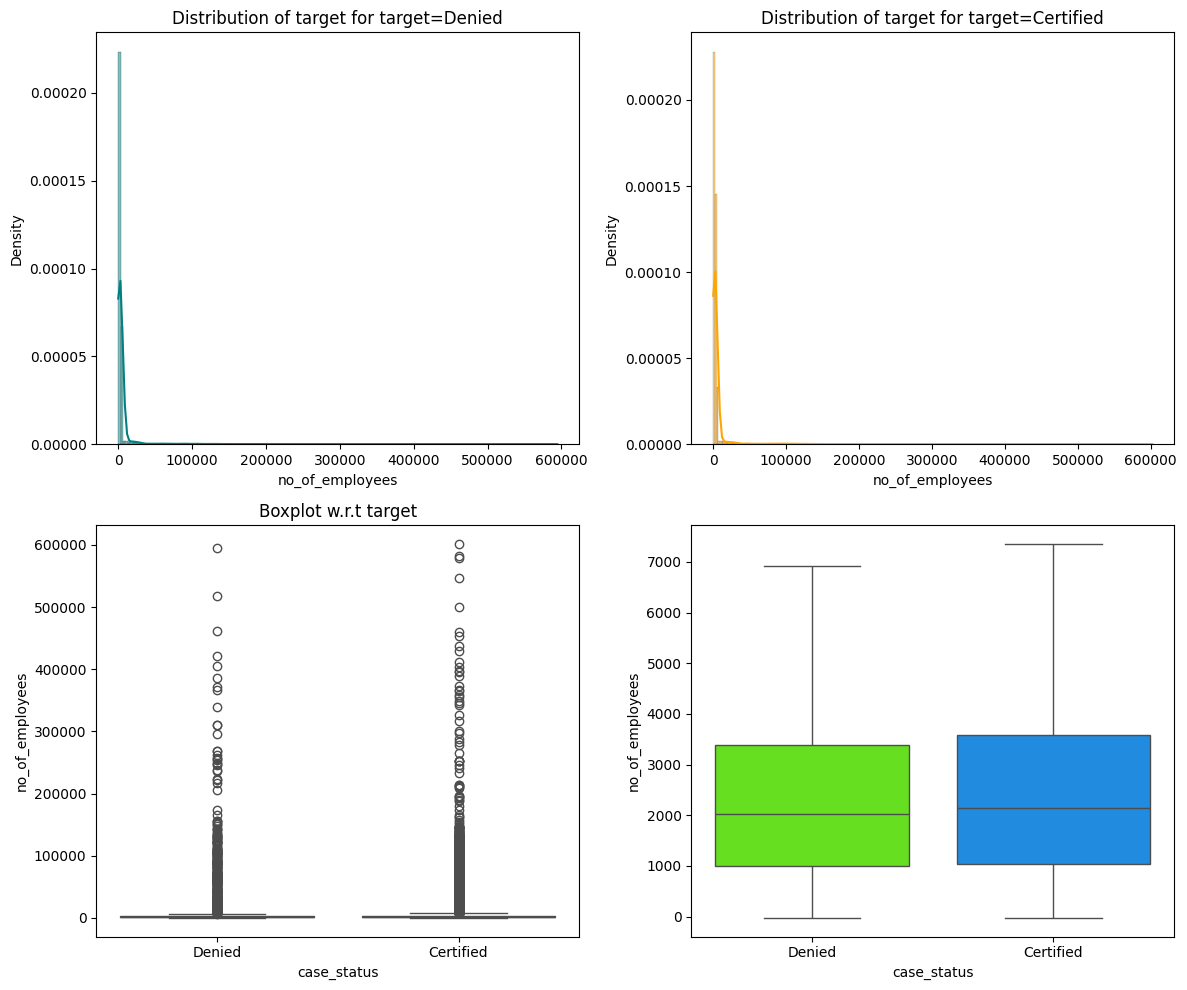

In [19]:
distribution_plot_with_target(df, "no_of_employees","case_status")

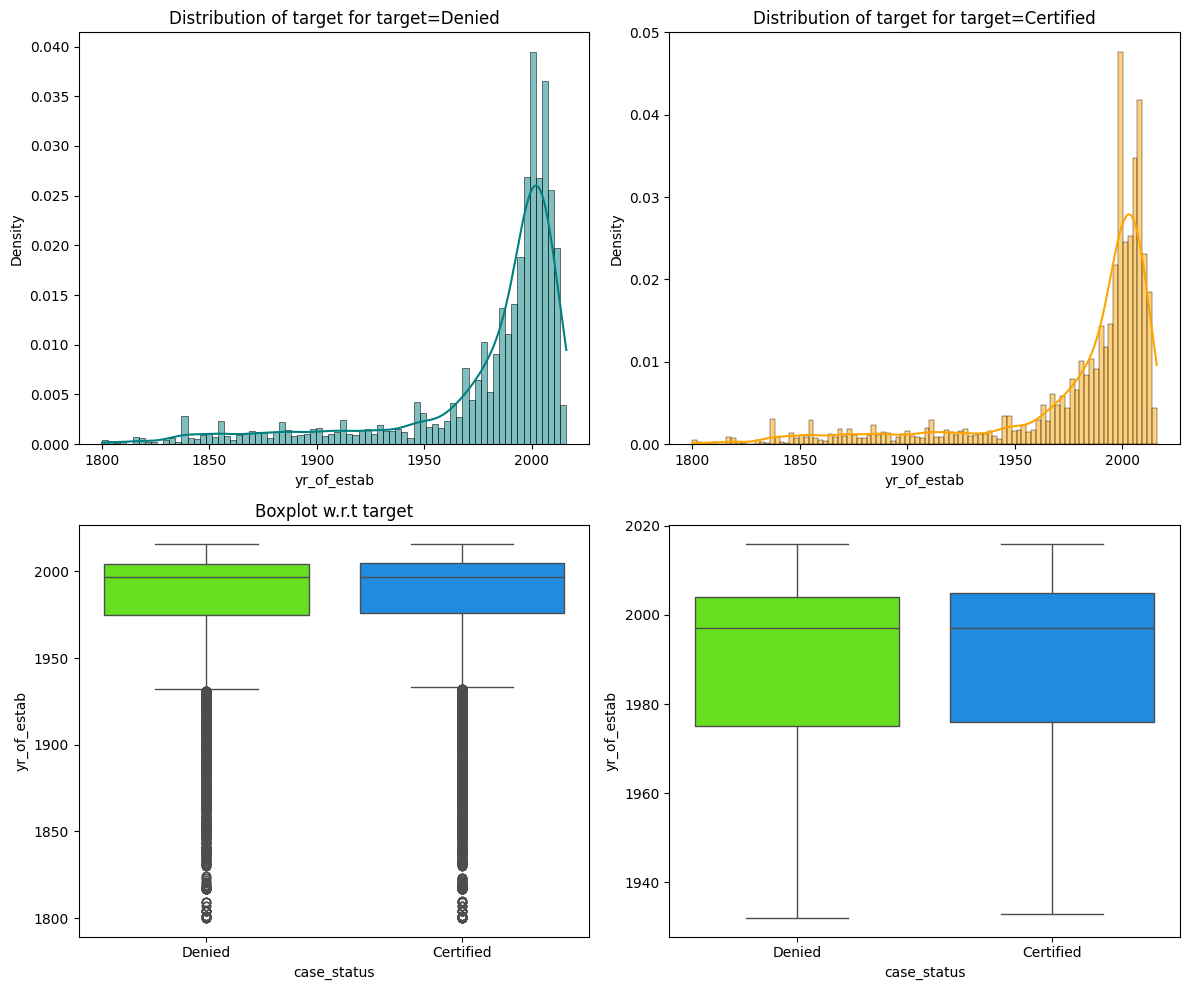

In [20]:
distribution_plot_with_target(df, "yr_of_estab","case_status")

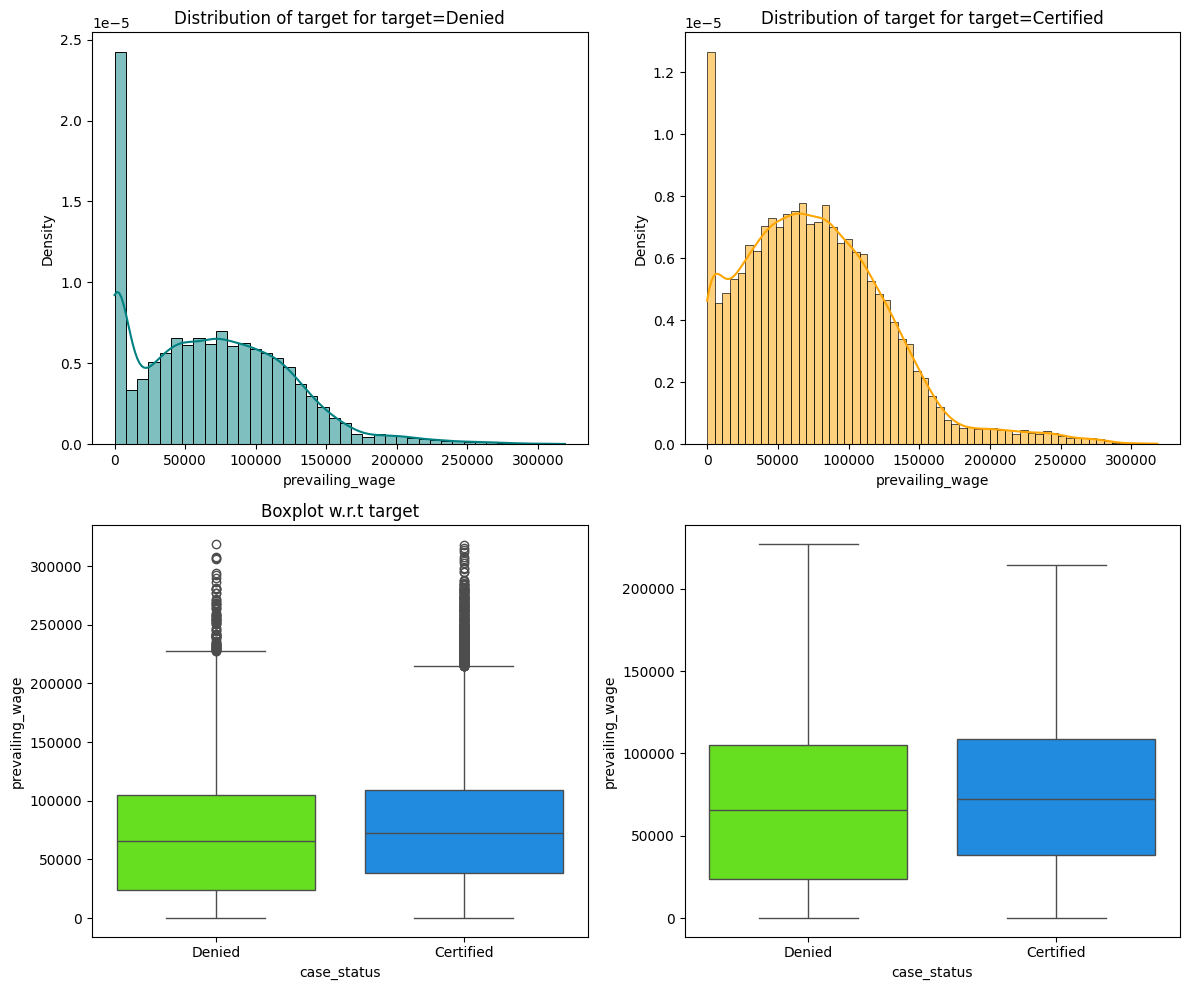

In [21]:
distribution_plot_with_target(df, "prevailing_wage","case_status")

In [24]:
def categorical_plot_wrt_target(data, predictor, target):
    """
    Visualize the relationship between a categorical predictor and a categorical target 
    using multiple plot types for better insight.

    This function produces a 2x2 grid of subplots:
        1. Count plot (frequency of predictor categories across target classes)
        2. Normalized stacked bar plot (percentage distribution)
        3. Heatmap of raw counts
        4. Heatmap of percentage distribution

    Parameters
    ----------
    data : pandas.DataFrame
        The dataset containing the predictor and target columns.
    predictor : str
        The name of the categorical predictor variable.
    target : str
        The name of the categorical target variable.

    Returns
    -------
    None
        The function displays visualizations and does not return a value.
    """

    # Set the overall figure size for all subplots (width=14, height=10)
    plt.figure(figsize=(14, 10))

    # --- COUNT PLOT ---
    # Create the first subplot (top-left position)
    plt.subplot(2, 2, 1)

    # Draw a count plot showing how the predictor categories are distributed across each target class (using hue for color separation)
    sns.countplot(data=data, x=predictor, hue=target, palette="Set2")

    # Set the title of the first subplot
    plt.title(f"Count of {predictor} by {target}")

    # Label the x-axis and y-axis
    plt.xlabel(predictor)
    plt.ylabel("Count")
    plt.xticks(rotation=90)

    # Add a legend showing the target categories
    plt.legend(title=target)

    # -- NORMALIZED (PERCENTAGE) STACKED BAR PLOT ---
    # Create the second subplot (top-right position)
    plt.subplot(2, 2, 2)

    # Create a crosstab to show how target categories are distributed 
    # within each predictor category (normalized by rows to get percentages)
    cross_tab = pd.crosstab(data[predictor], data[target], normalize='index') * 100

    # Plot the normalized crosstab as a stacked bar chart
    cross_tab.plot(kind='bar', stacked=True, ax=plt.gca(), colormap='Set3')

    # Add title and axis labels
    plt.title(f"Percentage distribution of {target} within each {predictor}")
    plt.ylabel("Percentage (%)")
    plt.xlabel(predictor)

    # Move the legend slightly outside the plot for better visibility
    plt.legend(title=target, bbox_to_anchor=(1.05, 1), loc='upper left')

    # --- HEATMAP OF RAW COUNTS ---
    # Create the third subplot (bottom-left position)
    plt.subplot(2, 2, 3)

    # Create a crosstab of raw counts between predictor and target
    cross_tab_counts = pd.crosstab(data[predictor], data[target])

    # Draw a heatmap to visualize the count values between predictor and target
    sns.heatmap(cross_tab_counts, annot=True, fmt='d', cmap="coolwarm")

    # Set the title and axis labels for this heatmap
    plt.title(f"Heatmap of {predictor} vs {target} (counts)")
    plt.xlabel(target)
    plt.ylabel(predictor)

    # --- HEATMAP OF PERCENTAGES ---
    # Create the fourth subplot (bottom-right position)
    plt.subplot(2, 2, 4)

    # Draw another heatmap using the percentage crosstab
    # Annotate each cell with percentage values (1 decimal place)
    sns.heatmap(cross_tab, annot=True, fmt=".1f", cmap="YlGnBu")

    # Set the title and axis labels for the percentage heatmap
    plt.title(f"Heatmap of {predictor} vs {target} (percentage)")
    plt.xlabel(target)
    plt.ylabel(predictor)

   
    plt.tight_layout()   # Adjust layout to prevent overlap between titles, labels, and subplots
    plt.show()    # Display all plots on the screen


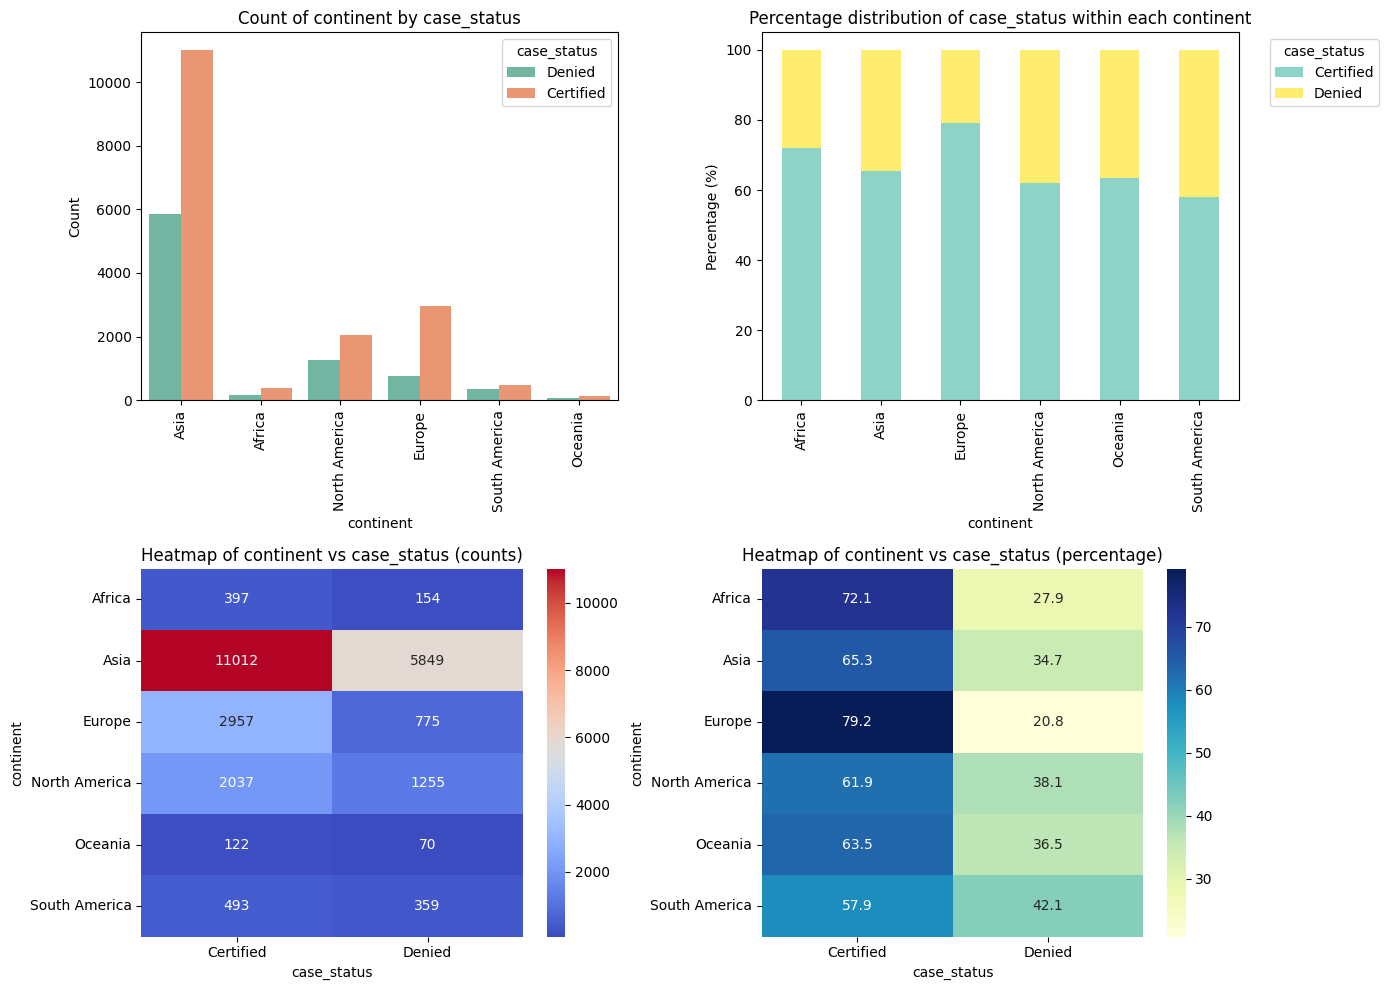

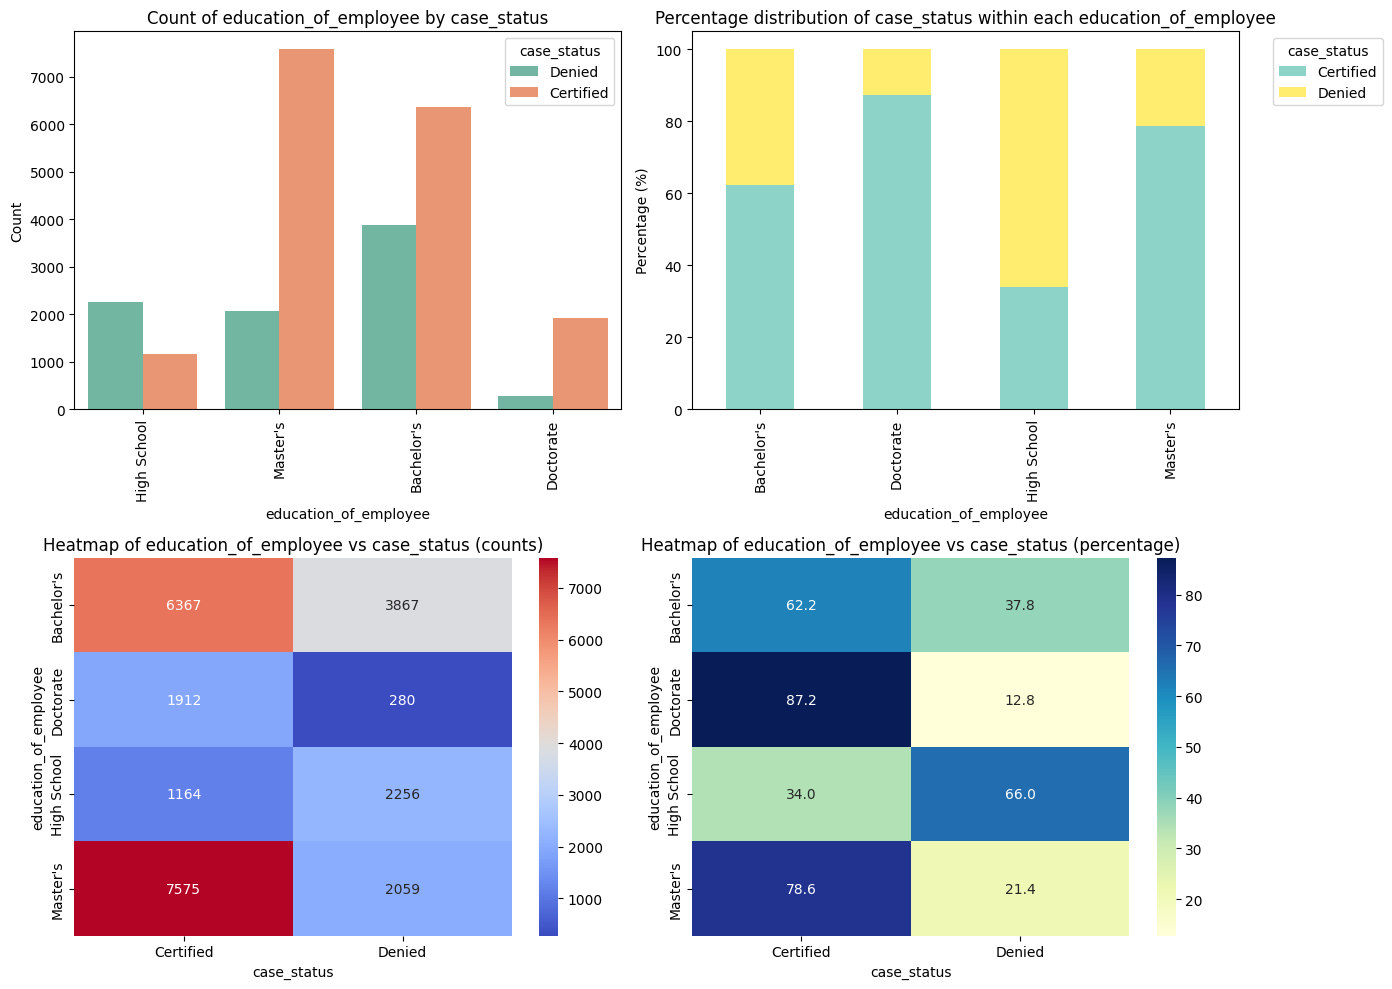

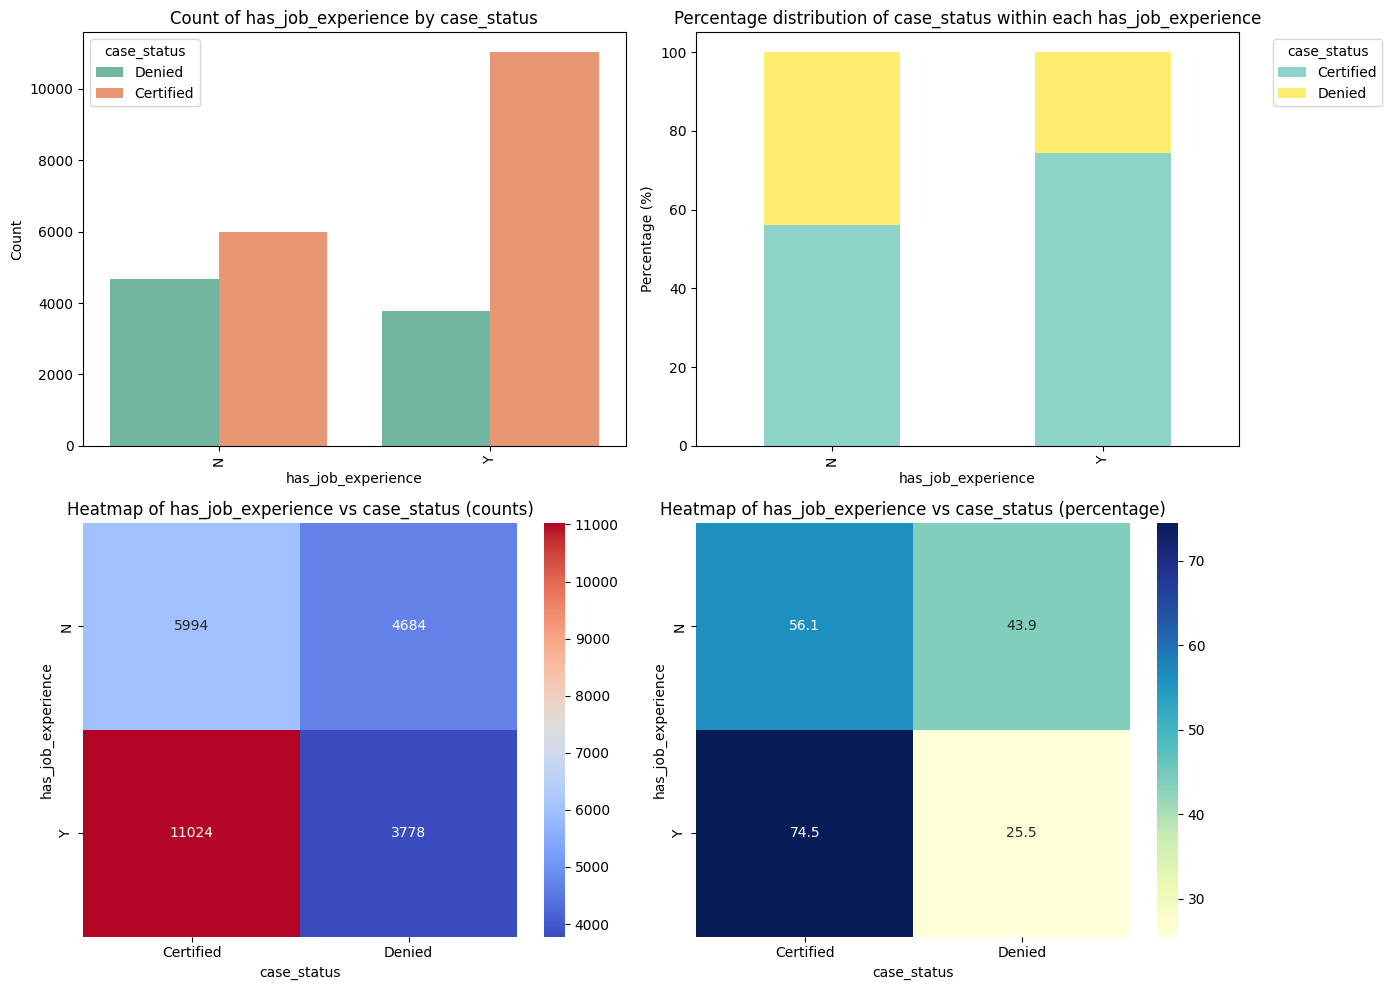

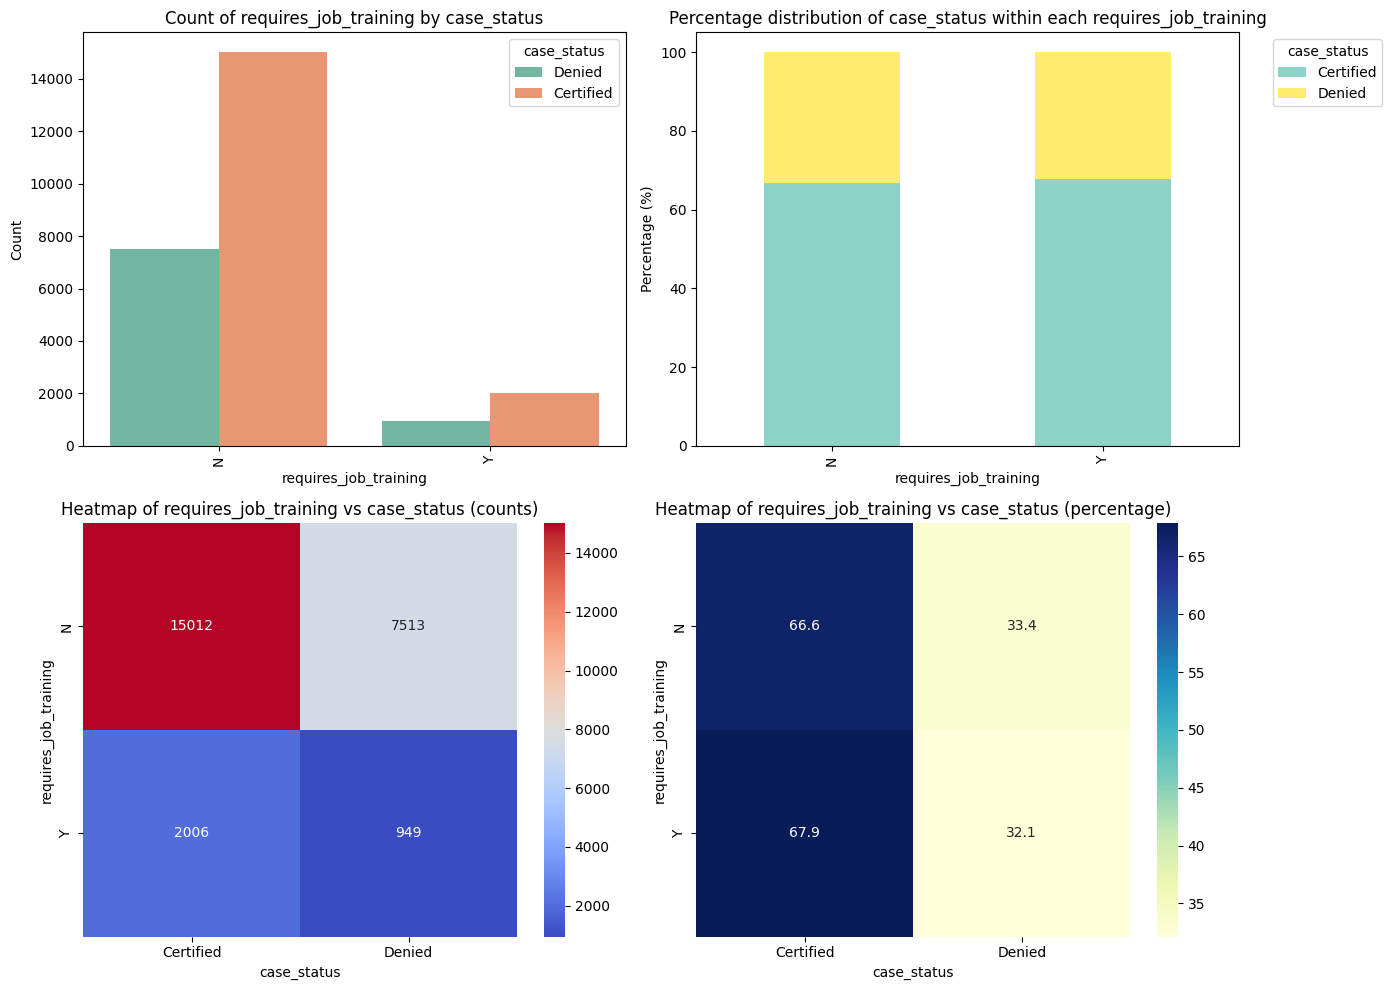

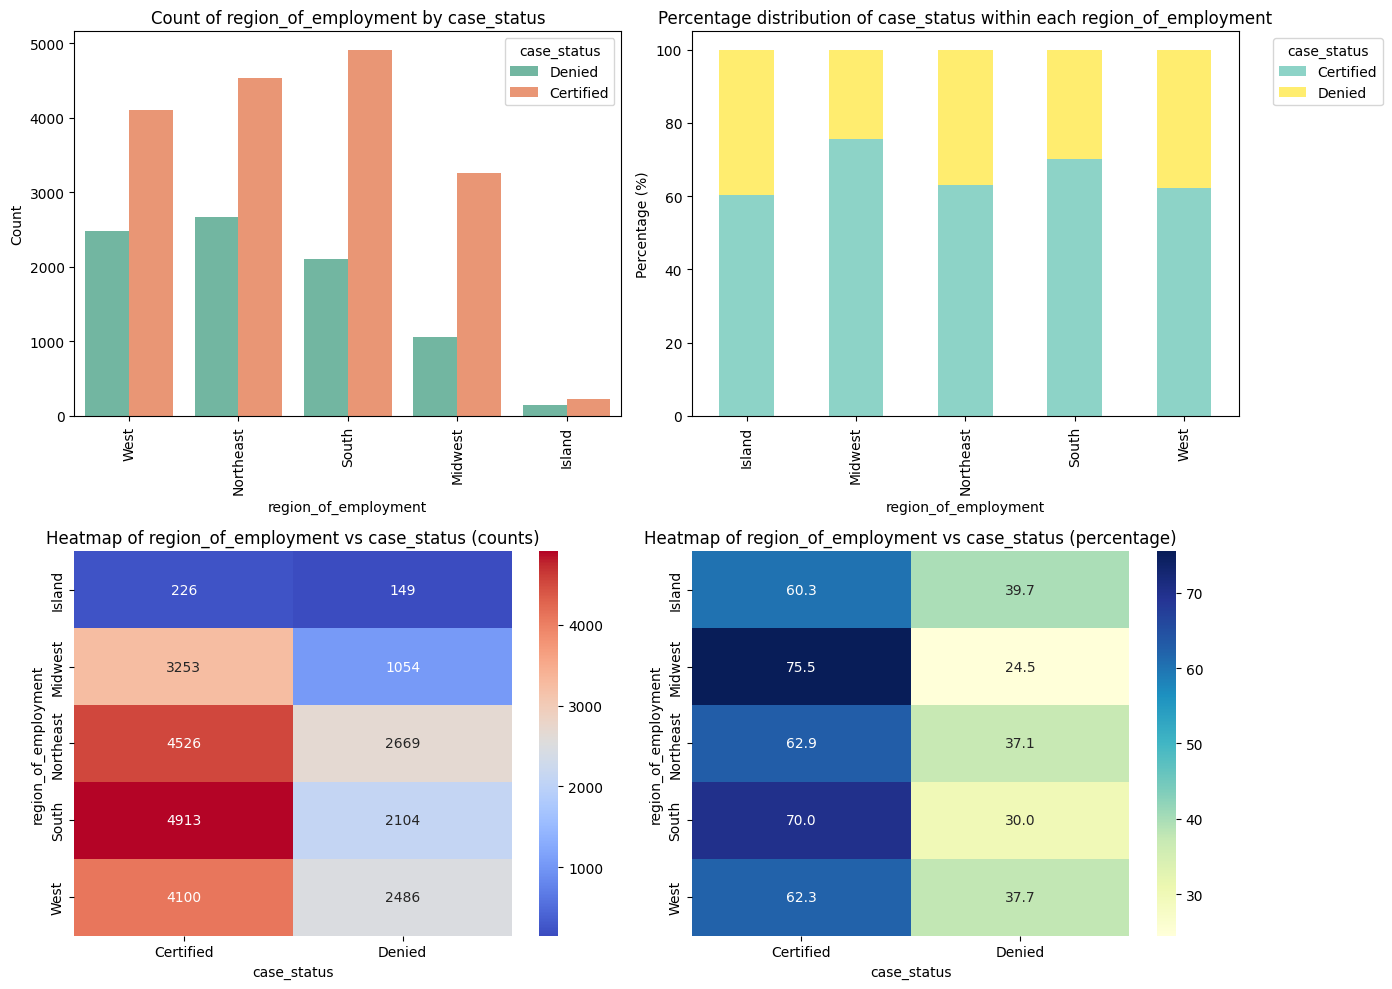

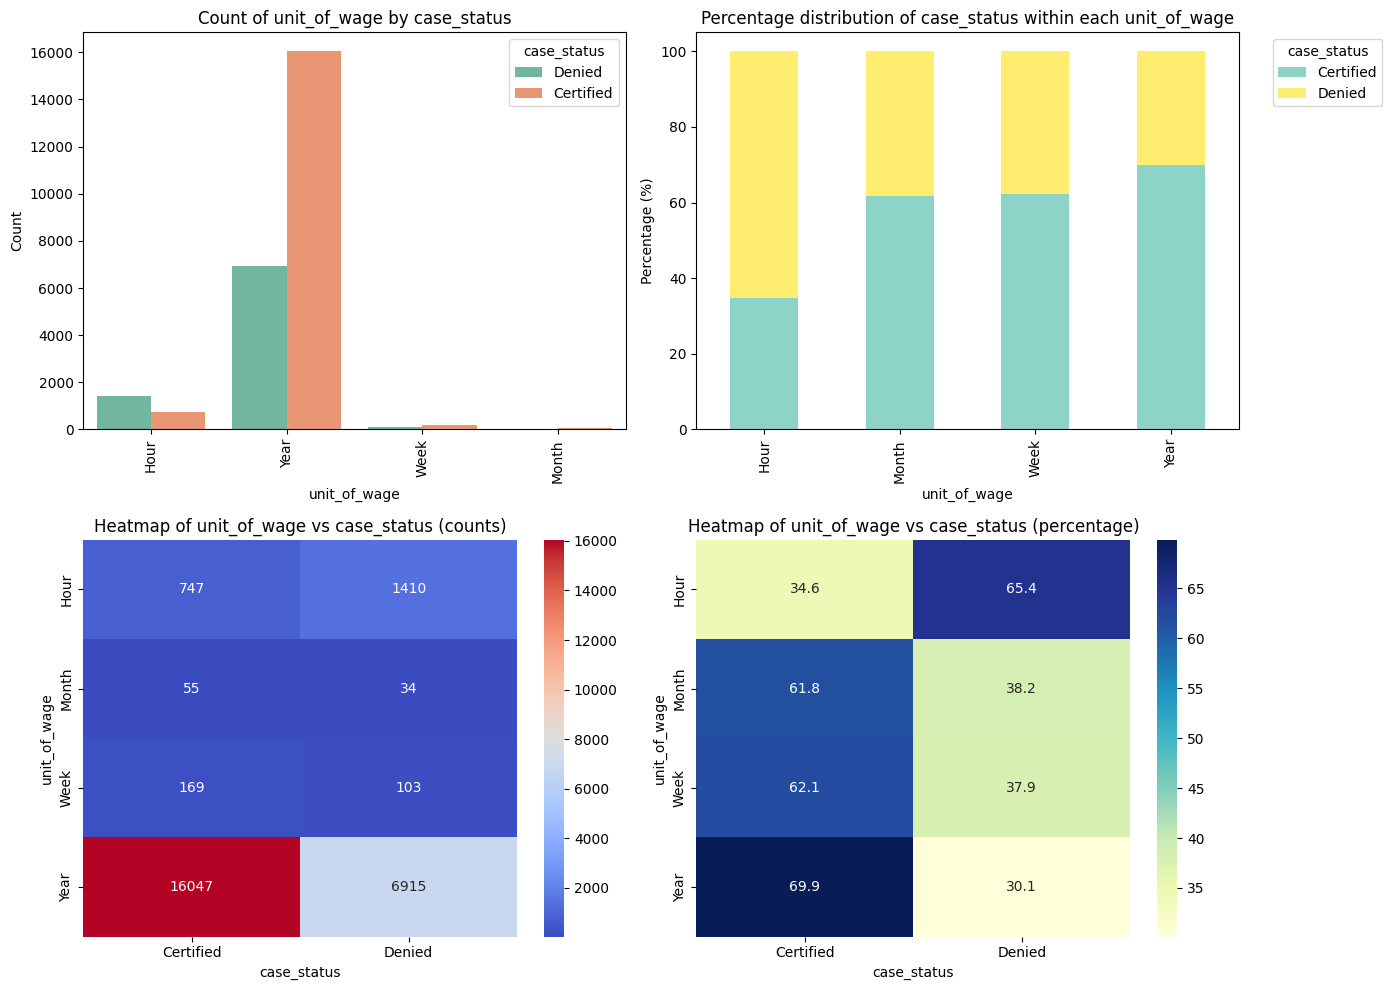

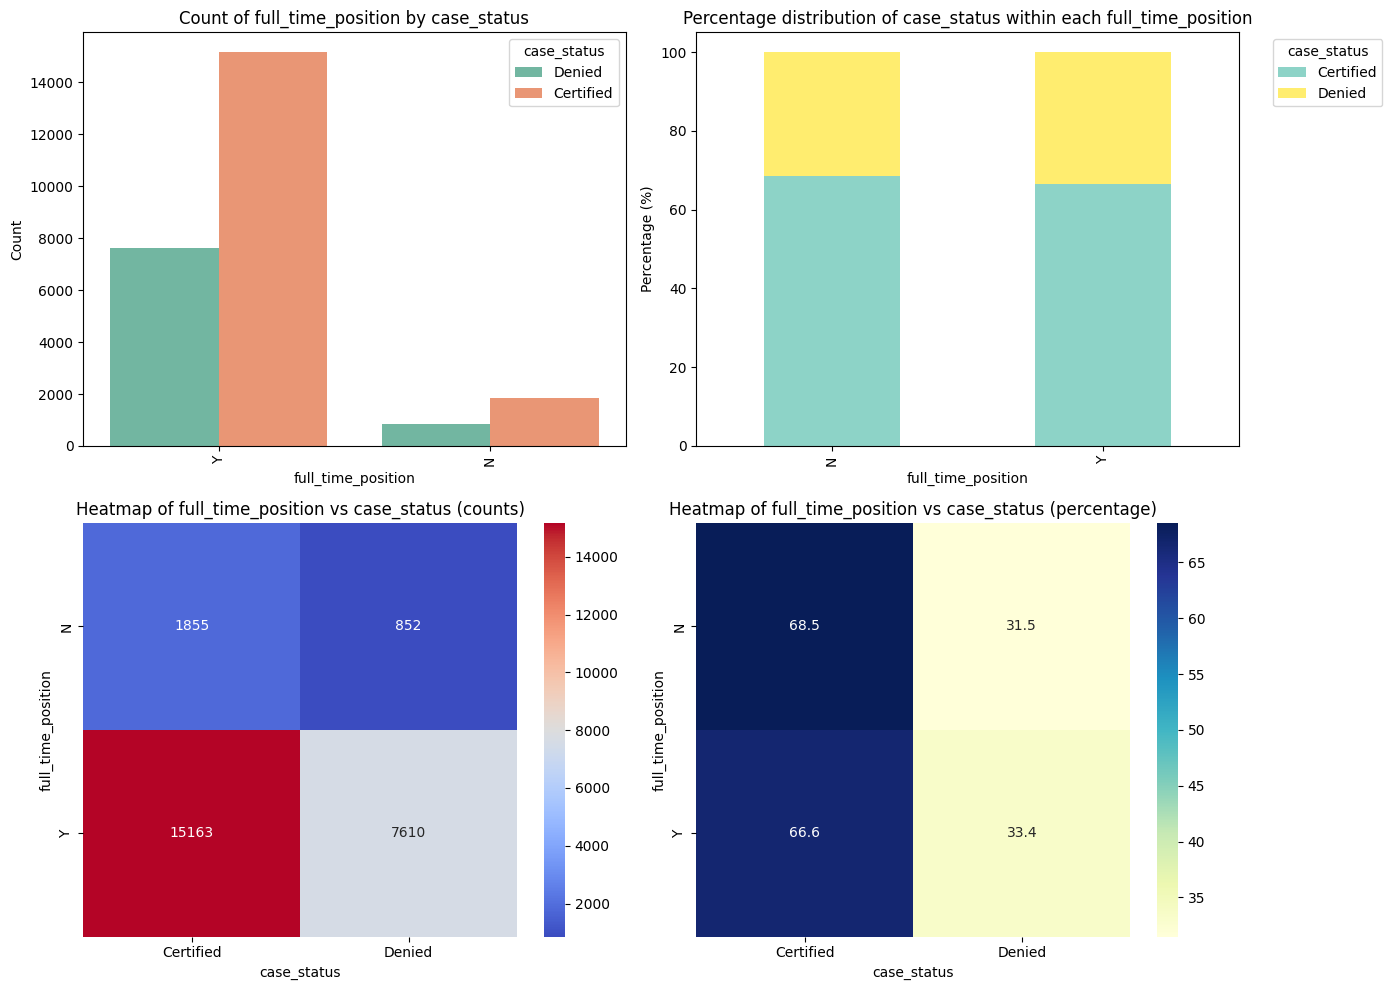

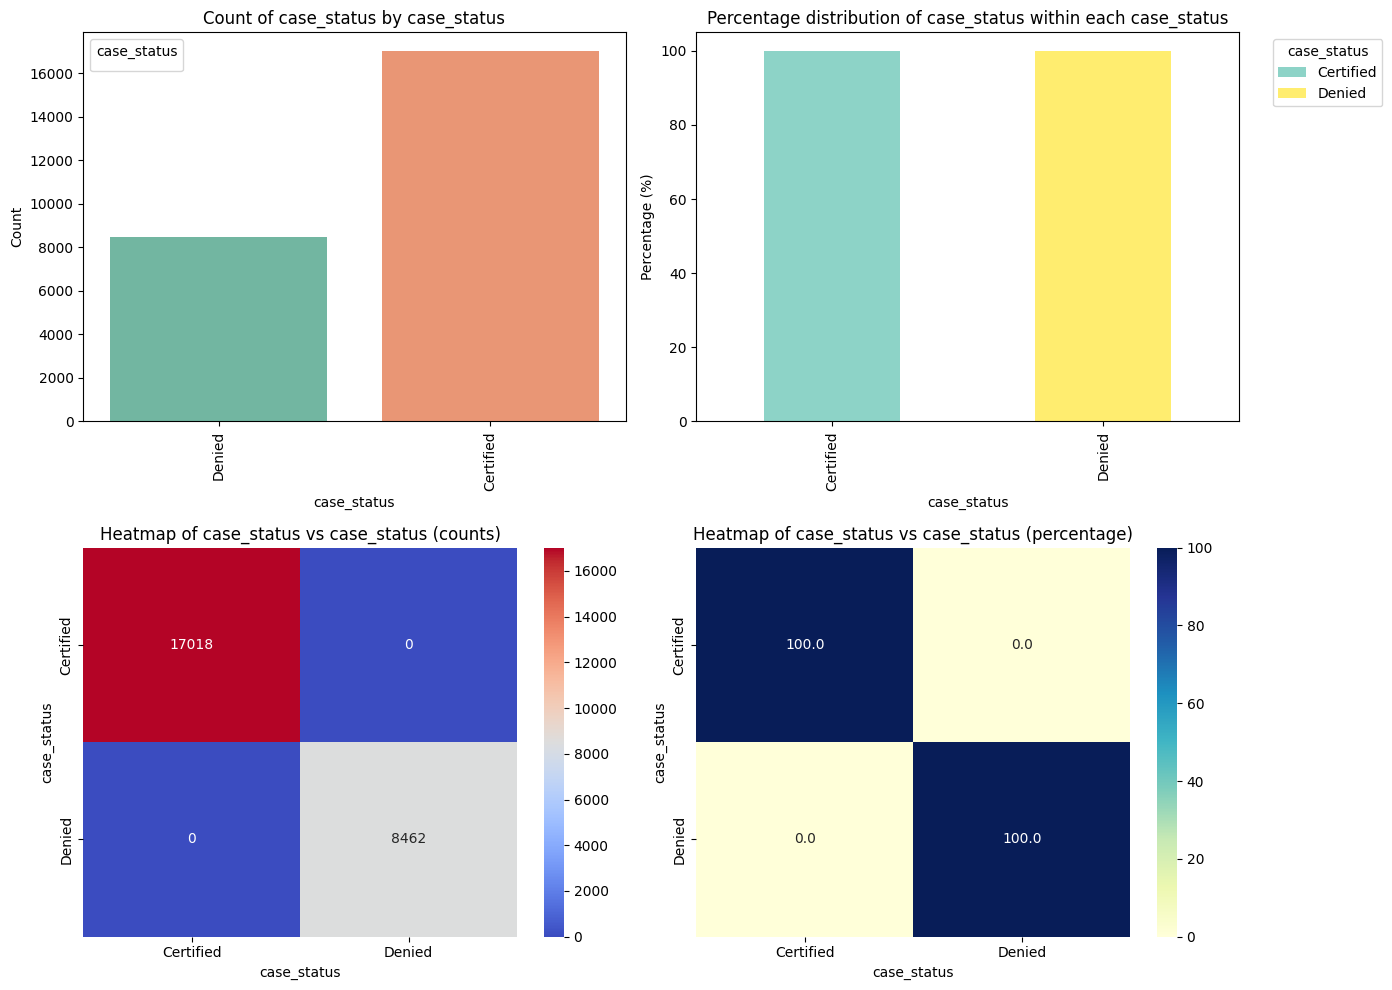

In [25]:
cat_features = list(df.select_dtypes("object").columns)
for col in cat_features :
    categorical_plot_wrt_target(df, col,"case_status")